In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.style.use('ggplot')
import datetime as dt
import seaborn as sns

In [2]:
aku = pd.read_csv("csvfile/aku.csv")
ari = pd.read_csv("csvfile/ari.csv")
ato = pd.read_csv("csvfile/ato.csv")
heart = pd.read_csv("csvfile/heart.csv")
sakai = pd.read_csv("csvfile/sakai.csv")
yamato = pd.read_csv("csvfile/yamato.csv")

aku = aku.drop(["Unnamed: 0"], axis=1)
ari = ari.drop(["Unnamed: 0"], axis=1)
ato = ato.drop(["Unnamed: 0"], axis=1)
heart = heart.drop(["Unnamed: 0"], axis=1)
sakai = sakai.drop(["Unnamed: 0"], axis=1)
yamato = yamato.drop(["Unnamed: 0"], axis=1)

# アート引越し

In [3]:
ato["引越し時期"] = pd.to_datetime(ato["引越し時期"])

In [4]:
t1 = []
for i in range(len(ari)):
   if ato["引越し先"][i] in ("青森", "岩手", "宮城", "秋田", "山形", "福島"):
      t1.append("東北")
   elif ato["引越し先"][i] in ("茨城", "栃木", "群馬", "埼玉", "千県", "神奈川"): # 東京は抜く
      t1.append("関東")
   elif ato["引越し先"][i] in ("新潟", "富山","石川", "福井", "岐阜",  "静岡",  "愛知",  "山梨", "長野"):
      t1.append("中部")
   elif ato["引越し先"][i] in ("滋賀",  "京都",  "大阪",  "兵庫",  "奈良",  "和歌山", "三重"):
      t1.append("近畿")
   elif ato["引越し先"][i] in ("鳥取",  "島根",  "岡山",  "広島",  "山口"):
      t1.append("中国")
   elif ato["引越し先"][i] in ("徳島",  "香川",  "愛媛",  "高知"):
      t1.append("四国")
   elif ato["引越し先"][i] in ("福岡",  "佐賀",  "長崎",  "熊本",  "大分",  "宮崎",  "鹿児島"):
      t1.append("九州")
   elif ato["引越し先"][i] == "沖縄":
      t1.append("沖縄")
   elif ato["引越し先"][i] == "東京":
      t1.append("東京")
   else:
      t1.append("北海道")

In [5]:
t2 = []
for i in range(len(ari)):
   if ato["現在地"][i] in ("青森", "岩手", "宮城", "秋田", "山形", "福島"):
      t2.append("東北")
   elif ato["現在地"][i] in ("茨城", "栃木", "群馬", "埼玉", "千県", "神奈川"): # 東京は抜く
      t2.append("関東")
   elif ato["現在地"][i] in ("新潟", "富山","石川", "福井", "岐阜",  "静岡",  "愛知",  "山梨", "長野"):
      t2.append("中部")
   elif ato["現在地"][i] in ("滋賀",  "京都",  "大阪",  "兵庫",  "奈良",  "和歌山", "三重"):
      t2.append("近畿")
   elif ato["現在地"][i] in ("鳥取",  "島根",  "岡山",  "広島",  "山口"):
      t2.append("中国")
   elif ato["現在地"][i] in ("徳島",  "香川",  "愛媛",  "高知"):
      t2.append("四国")
   elif ato["現在地"][i] in ("福岡",  "佐賀",  "長崎",  "熊本",  "大分",  "宮崎",  "鹿児島"):
      t2.append("九州")
   elif ato["現在地"][i] == "沖縄":
      t2.append("沖縄")
   elif ato["現在地"][i] == "東京":
      t2.append("東京")
   else:
      t2.append("北海道")

In [6]:
t3 = []
for i in range(len(ato)):
    if ato["引越し先"][i] in ("東京", "神奈川", "埼玉", "千県"):
        t3.append("東京圏")
    else:
        t3.append("q")

In [7]:
ato["移住地方"] = t2
ato["移住先地方"] = t1
ato["東京圏"] = t3

In [8]:
ato['移住地方'].value_counts() 

関東     103
近畿      96
東京      81
中部      56
北海道     46
東北      40
中国      27
九州      18
四国      11
沖縄       2
Name: 移住地方, dtype: int64

In [11]:
ato['移住先地方'].value_counts() 

関東     109
近畿      89
中部      60
東京      51
北海道     46
東北      41
九州      36
中国      29
四国      18
沖縄       1
Name: 移住先地方, dtype: int64

In [9]:
tokyoken = ato[ato["東京圏"] == "東京圏"]
tokyoken.shape

(129, 18)

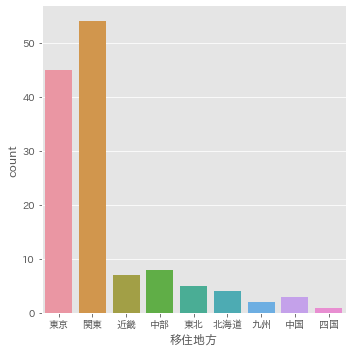

In [10]:
sns.catplot(x="移住地方", data=tokyoken, kind="count")

In [305]:
tokyoken["移住地方"].value_counts()

関東     54
東京     45
中部      8
近畿      7
東北      5
北海道     4
中国      3
九州      2
四国      1
Name: 移住地方, dtype: int64

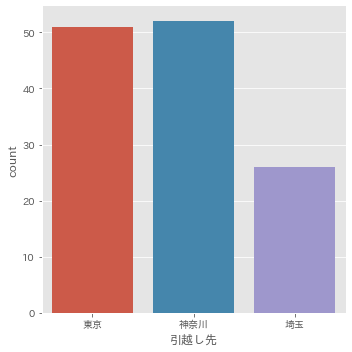

In [306]:
sns.catplot(x="引越し先", data=tokyoken, kind="count")

In [307]:
tokyoken["引越し先"].value_counts()

神奈川    52
東京     51
埼玉     26
Name: 引越し先, dtype: int64

Text(0.5, 1.0, 'アートの東京圏')

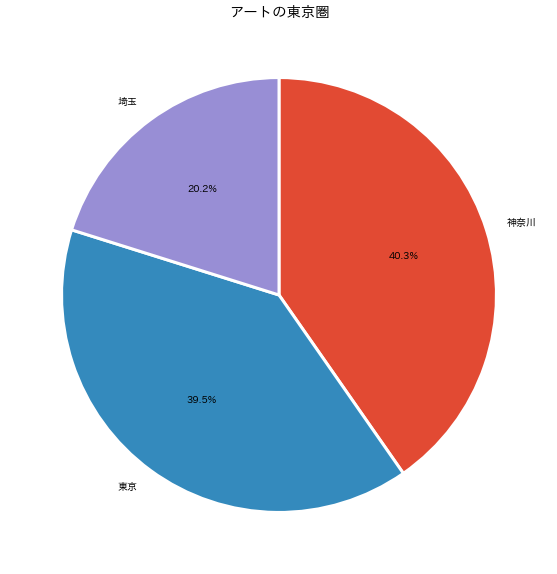

In [309]:
plt.pie(tokyoken["引越し先"].value_counts(),labels=["神奈川","東京","埼玉"],
counterclock=False, startangle=90, autopct="%1.1f%%",
#colors=["red","blue","green"],
wedgeprops={'linewidth': 3, 'edgecolor':"white"},
)
plt.title("アートの東京圏の引越し先")

神奈川    52
東京     51
埼玉     26
129

# 移住地方が東京で東京へ引っ越す人の分析

(81, 17)


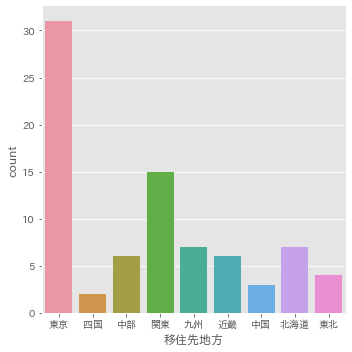

In [231]:
tokyo = ato[ato["移住地方"]=="東京"]
print(tokyo.shape)
sns.catplot(x="移住先地方", data=tokyo, kind="count")

(31, 17)


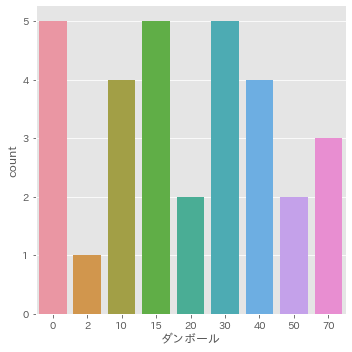

In [232]:
tokyo2 = ato[(ato["移住地方"]=="東京")&(ato["移住先地方"]=="東京")]
print(tokyo2.shape)
sns.catplot(x="ダンボール", data=tokyo2, kind="count")

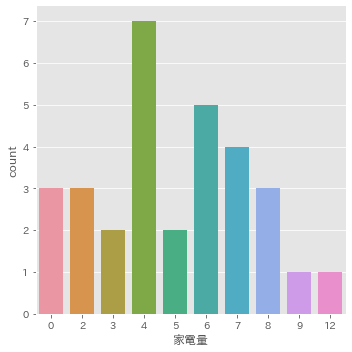

In [233]:
sns.catplot(x="家電量", data=tokyo2, kind="count")

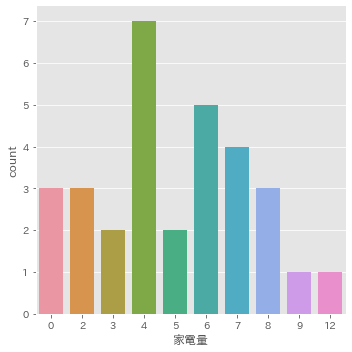

In [234]:
sns.catplot(x="家電量", data=tokyo2, kind="count")

In [51]:
ato_2022 = ato[(ato["引越し時期"] > dt.datetime(2022,1,1)) & (ato["引越し時期"] < dt.datetime(2022,12,31))]
print(ato_2022.shape)

(187, 17)


In [53]:
ato_2022.groupby("移住地方").mean()

/var/folders/84/r3ff3p5977l5y2fvhc9v0xxh0000gn/T/ipykernel_25002/4012210261.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ato_2022.groupby("移住地方").mean()


,評価,電話・メール対応,見積もり対応,作業員,サービス,家具量,家電量,ダンボール,見積もり比較社数
移住地方,,,,,,,,,
中国,4.428571,4.285714,4.428571,4.428571,4.571429,4.714286,5.714286,28.571429,3.714286
中部,4.359375,4.437500,4.500000,4.187500,4.312500,4.375000,4.000000,21.187500,5.125000
九州,4.437500,4.500000,4.500000,4.500000,4.250000,3.500000,3.500000,10.000000,5.500000
北海道,4.597826,4.478261,4.434783,4.826087,4.652174,6.043478,4.869565,24.434783,6.043478
北陸,4.750000,4.666667,5.000000,4.666667,4.666667,4.000000,1.666667,20.000000,5.000000
四国,4.500000,4.500000,4.750000,3.750000,5.000000,5.250000,6.000000,21.250000,4.250000
東北,4.295455,4.136364,4.272727,4.272727,4.500000,5.318182,4.545455,18.090909,4.136364
沖縄,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,4.000000,30.000000,5.000000
近畿,4.212500,4.100000,4.325000,4.325000,4.100000,4.775000,5.200000,22.475000,5.375000


In [54]:
ato_2022.groupby("移住先地方").mean()

/var/folders/84/r3ff3p5977l5y2fvhc9v0xxh0000gn/T/ipykernel_25002/2205866233.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ato_2022.groupby("移住先地方").mean()


,評価,電話・メール対応,見積もり対応,作業員,サービス,家具量,家電量,ダンボール,見積もり比較社数
移住先地方,,,,,,,,,
中国,4.312500,4.333333,4.333333,4.333333,4.250000,4.750000,7.083333,35.833333,3.750000
中部,4.000000,4.214286,4.428571,3.714286,3.642857,3.928571,3.857143,22.142857,5.857143
九州,4.775000,4.800000,4.800000,4.800000,4.700000,4.000000,3.200000,13.900000,4.900000
北海道,4.583333,4.458333,4.625000,4.708333,4.541667,5.541667,3.666667,21.333333,6.083333
北陸,4.500000,4.500000,4.166667,4.666667,4.666667,4.166667,2.833333,20.833333,4.500000
四国,4.625000,4.500000,4.750000,4.250000,5.000000,5.000000,5.750000,17.250000,4.000000
東北,4.275000,4.100000,4.200000,4.250000,4.550000,6.150000,5.750000,19.150000,4.250000
近畿,4.256579,4.157895,4.421053,4.289474,4.157895,4.736842,5.421053,25.000000,5.078947
関東,4.326271,4.305085,4.271186,4.372881,4.355932,5.372881,5.084746,25.983051,5.271186


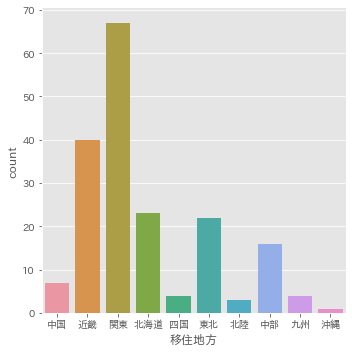

In [55]:
sns.catplot(x="移住地方", data=ato_2022, kind="count")

移住元は関東、近畿が多い

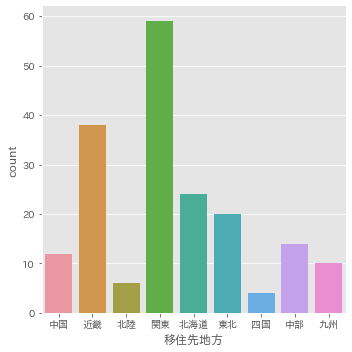

In [57]:
sns.catplot(x="移住先地方", data=ato_2022, kind="count")

移住先も同様に関東、近畿

(array([ 8.,  3., 17., 53., 58., 26.,  8., 14.]),
 array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ]),
 <BarContainer object of 8 artists>)

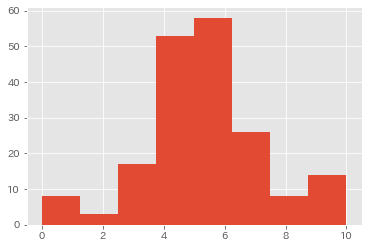

In [76]:
plt.hist(ato_2022['見積もり比較社数'], bins=8)

見積もり社数はbin=8にすると、若干正規分布に近づく

(array([ 4., 17., 67., 99.]),
 array([2.25  , 2.9375, 3.625 , 4.3125, 5.    ]),
 <BarContainer object of 4 artists>)

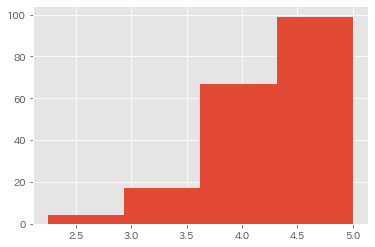

In [59]:
plt.hist(ato_2022['評価'], bins=4)

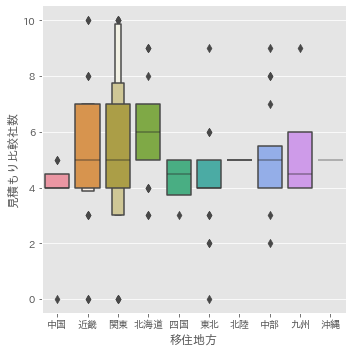

In [58]:
#kind='boxen'と指定
sns.catplot(x='移住地方', y='見積もり比較社数', data=ato_2022, kind='boxen')
plt.show()

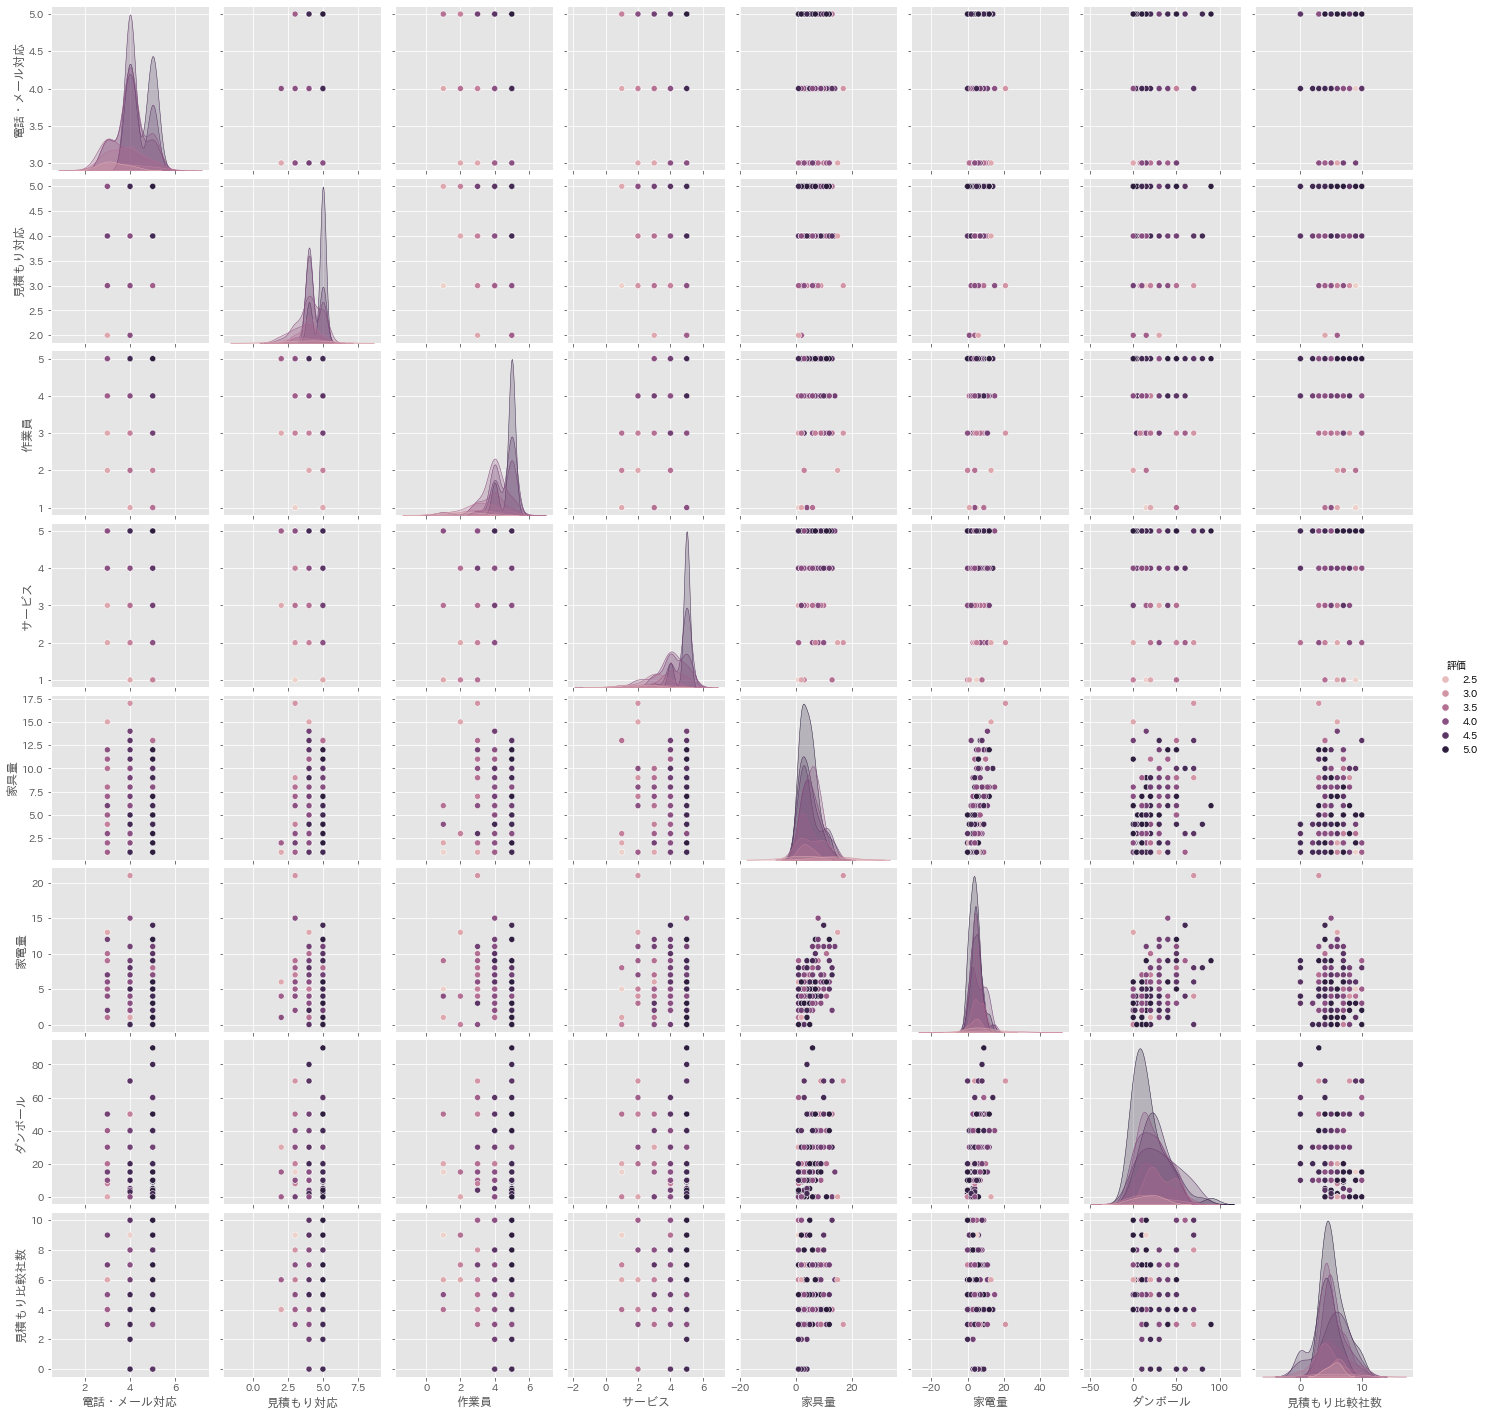

In [61]:
sns.pairplot(data=ato_2022, hue='評価')
plt.show()

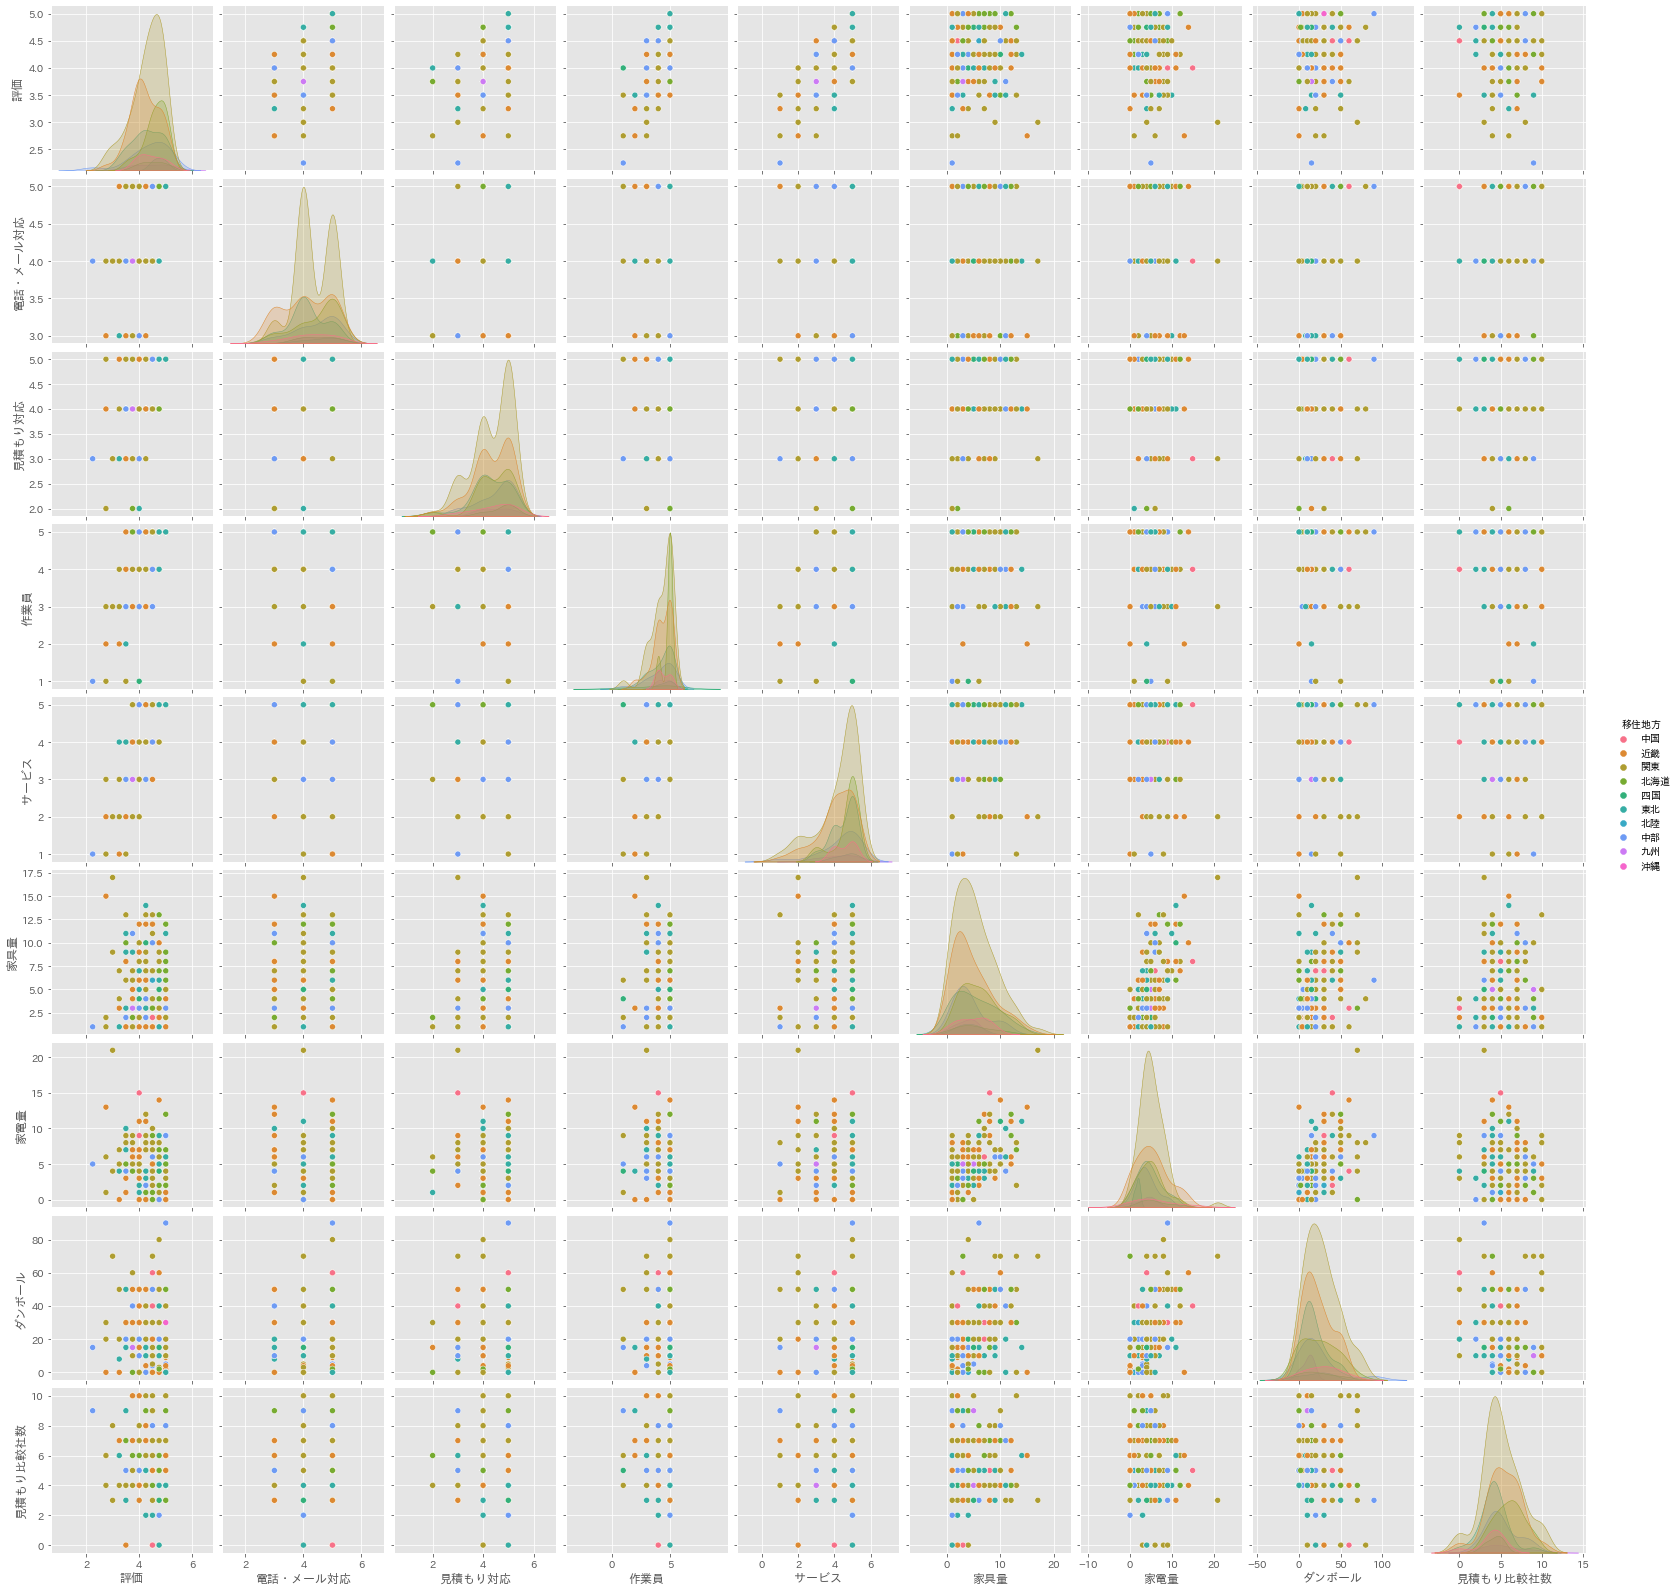

In [62]:
sns.pairplot(data=ato_2022, hue='移住地方')
plt.show()

<AxesSubplot: xlabel='引越し時期'>

<Figure size 432x288 with 0 Axes>

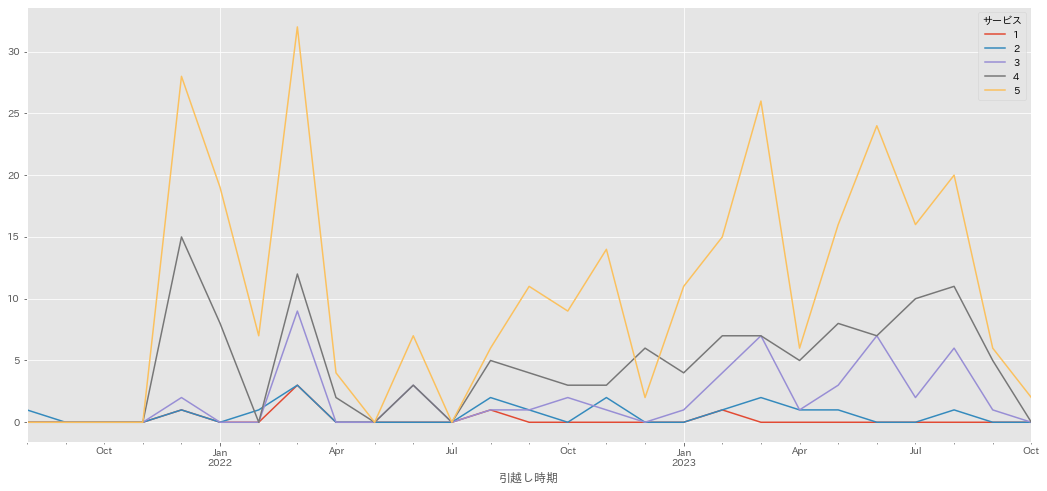

In [63]:
ato["引越し時期"] = pd.to_datetime(ato["引越し時期"])
ato_score_month = pd.crosstab(ato["引越し時期"],ato["評価"], dropna=False)
ato_score_month = ato_score.resample("M").sum()
plt.figure()
ato_score_month.plot(figsize=(18,8))

<AxesSubplot: xlabel='引越し時期'>

<Figure size 432x288 with 0 Axes>

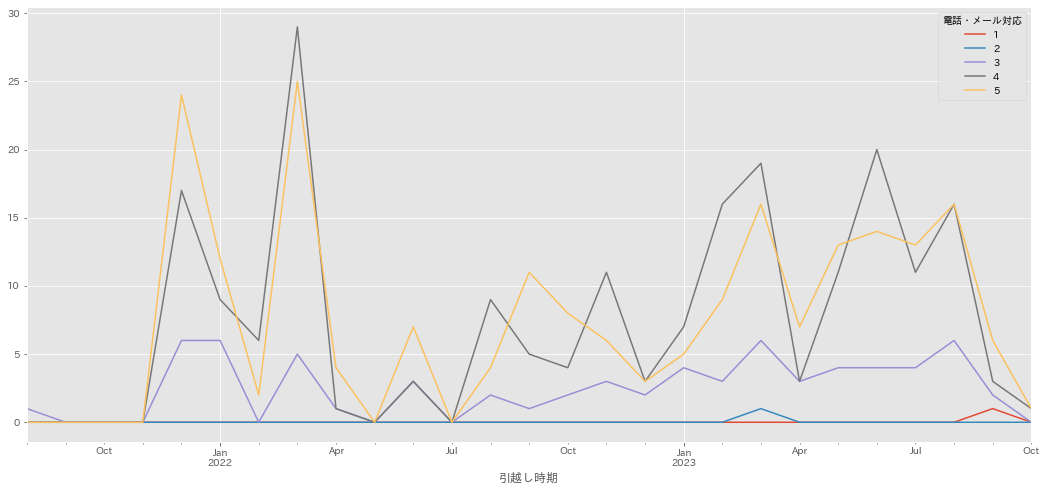

In [64]:
ato["引越し時期"] = pd.to_datetime(ato["引越し時期"])
ato_score = pd.crosstab(ato["引越し時期"],ato["電話・メール対応"], dropna=False)
ato_score_month = ato_score.resample("M").sum()
plt.figure()
ato_score_month.plot(figsize=(18,8))

<AxesSubplot: xlabel='引越し時期'>

<Figure size 432x288 with 0 Axes>

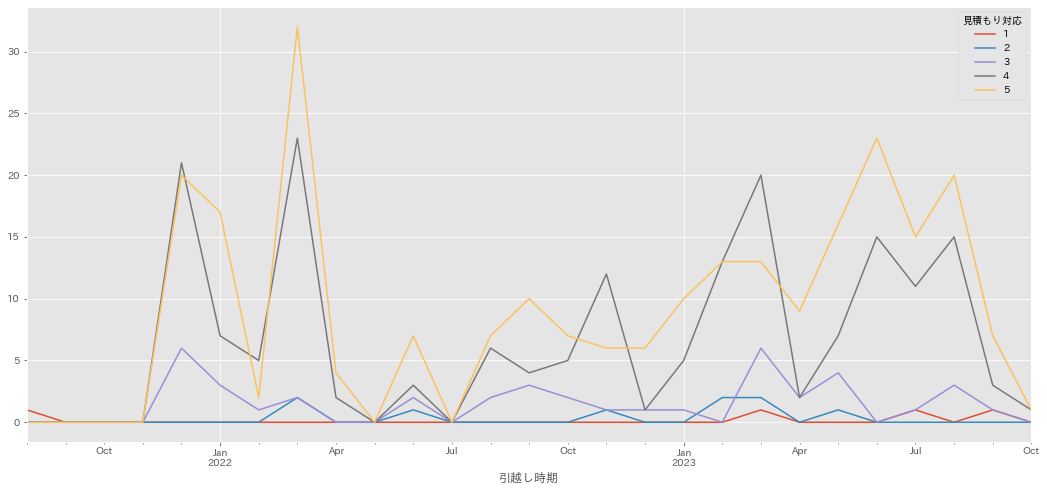

In [65]:
ato_score = pd.crosstab(ato["引越し時期"],ato["見積もり対応"], dropna=False)
ato_score_month = ato_score.resample("M").sum()
plt.figure()
ato_score_month.plot(figsize=(18,8))

<AxesSubplot: xlabel='引越し時期'>

<Figure size 432x288 with 0 Axes>

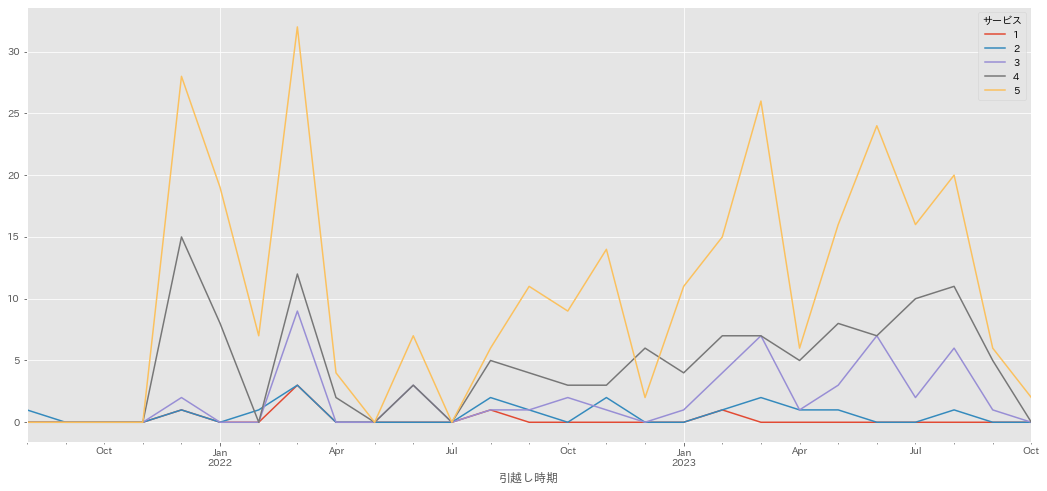

In [66]:
ato_score = pd.crosstab(ato["引越し時期"],ato["サービス"], dropna=False)
ato_score_month = ato_score.resample("M").sum()
plt.figure()
ato_score_month.plot(figsize=(18,8))

In [70]:
# MeCabで形態素解析を行う
import MeCab

def mecab_text(text):
    
    #MeCabのインスタンスを作成（辞書はmecab-ipadic-neologdを使用）
    mecab = MeCab.Tagger('-Owakati')
    
    #形態素解析
    node = mecab.parseToNode(text)
    
    #形態素解析した結果を格納するリスト
    wordlist = []
    
    while node:
        #名詞のみリストに格納する
        if node.feature.split(',')[0] == '名詞':
            wordlist.append(node.surface)
        #形容詞を取得、elifで追加する
        elif node.feature.split(',')[0] == '形容詞':
            wordlist.append(node.surface)
        #動詞を取得、elifで追加する
        #elif node.feature.split(',')[0] == '動詞':
        #    wordlist.append(node.surface)
        node = node.next
    return wordlist

# 形態素結果をリスト化し、データフレームdf1に結果を列追加する
ato_2022['words'] = ato_2022['口コミ'].apply(mecab_text)




/var/folders/84/r3ff3p5977l5y2fvhc9v0xxh0000gn/T/ipykernel_25002/1709131519.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ato_2022['words'] = ato_2022['口コミ'].apply(mecab_text)


In [71]:
# nlplotで直近1カ月のレビューを可視化・分析
# 頻出単語
import nlplot

npt = nlplot.NLPlot(ato_2022, target_col='words')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定
stopwords = npt.get_stopword(top_n=0, min_freq=0)

npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
    stopwords=stopwords,
)


100%|██████████| 187/187 [00:00<00:00, 75156.65it/s]


In [72]:
# ワードクラウド
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stopwords,
)
